 Dataset: Insurance dataset from Kaggle
 Location: https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset
 Target (Y): charges (medical costs billed)
 Predictors (Xs): age and bmi
 Reason: Age and BMI are continuous variables likely correlated with charges.
 This is a good prediction sample because predicting healthcare cost is a
 classic regression problem in machine learning.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
url = "https://raw.githubusercontent.com/BrennonAry/Assignment5/main/insurance.csv"
df = pd.read_csv(url)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
X = df[['age', 'bmi']]   # input variables
y = df['charges']        # target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 131440262.76073726
R-squared: 0.1533569292467798


Text(0.5, 1.0, 'Charges vs Age')

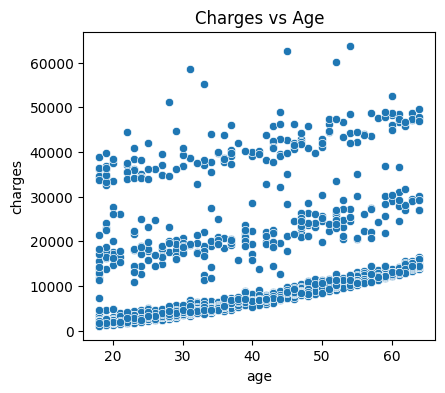

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.scatterplot(x=df['age'], y=df['charges'])
plt.title('Charges vs Age')

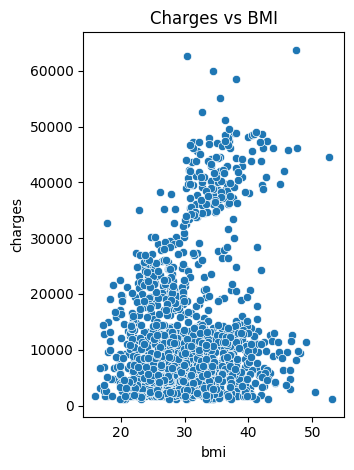

In [13]:
plt.subplot(1,2,2)
sns.scatterplot(x=df['bmi'], y=df['charges'])
plt.title('Charges vs BMI')

plt.tight_layout()
plt.show()

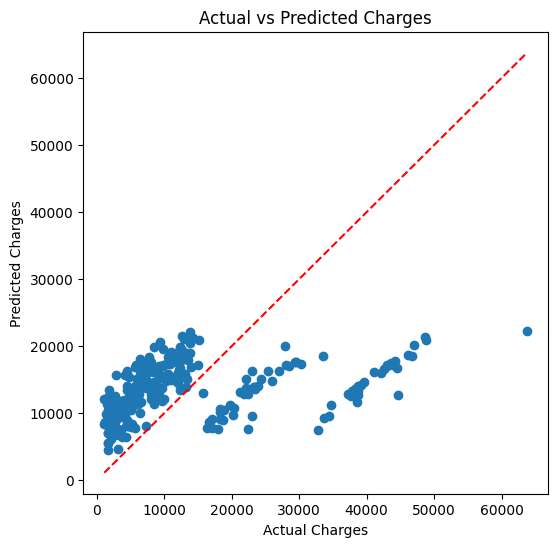

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [15]:
print("Intercept:", model.intercept_)
print("Coefficients (age, bmi):", model.coef_)

Intercept: -5571.083408548648
Coefficients (age, bmi): [223.79653146 330.79448868]


In [16]:
# -----------------------------------------------------------
# Comment on prediction:
# This model predicts a patient's medical charges based on age and BMI.
# -----------------------------------------------------------